In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

In [2]:
# Reading source files
ur_df = pd.read_csv('ex3-2/unemployement-rate-1948-2010.csv')
# display firt 5 records
ur_df.head(5)

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
# read source file
expenditures_df = pd.read_csv('ex3-2/expenditures.txt', '\t')
# display firt 5 records
expenditures_df.head(5)

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


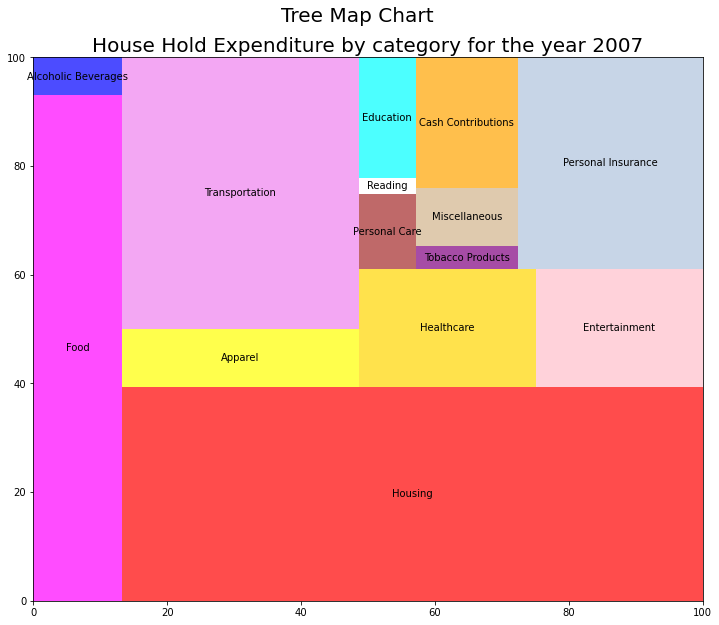

In [4]:
# Plot Tree Map
# Create year_in filter variable

years = 2007
plt.figure(figsize=(12,10))
color_list = {'Food':'magenta', 'Alcoholic Beverages':'blue', 'Housing':'red', 
              'Apparel':'yellow', 'Transportation':'violet', 'Healthcare':'gold', 
              'Entertainment':'pink', 'Personal Care':'brown','Reading':'white', 
              'Education':'aqua', 'Tobacco Products':'purple', 'Miscellaneous':'tan', 
              'Cash Contributions': 'orange', 'Personal Insurance': 'lightsteelblue'}
c = expenditures_df['category'].apply(lambda x: color_list[x])
# plot tree map

squarify.plot(sizes=expenditures_df[expenditures_df.year == years].expenditure, label=expenditures_df[expenditures_df.year == years].category, color = c, alpha=0.7)
subtitle = f'House Hold Expenditure by category for the year {years}'
plt.suptitle('Tree Map Chart', y=0.95, fontsize=20)
plt.title(subtitle, fontsize=20)
plt.show()

In [5]:
# Map Month numbers to Actual Months
months_dict = {"M01": "Jan", "M02": "Feb", "M03": "Mar", "M04": "Apr", "M05": "May", "M06": "Jun", 
               "M07": "Jul", "M08": "Aug", "M09": "Sep", "M10": "Oct", "M11": "Nov", "M12": "Dec"}
ur_df.replace({"Period": months_dict}, inplace=True)

# Combine Month and Year columns to a single datetime column
ur_df["MoYr"] = pd.to_datetime(ur_df.Period + ' ' + ur_df.Year.astype(str))
ur_df.head(5)

,Series id,Year,Period,Value,MoYr
0,LNS14000000,1948,Jan,3.4,1948-01-01
1,LNS14000000,1948,Feb,3.8,1948-02-01
2,LNS14000000,1948,Mar,4.0,1948-03-01
3,LNS14000000,1948,Apr,3.9,1948-04-01
4,LNS14000000,1948,May,3.5,1948-05-01


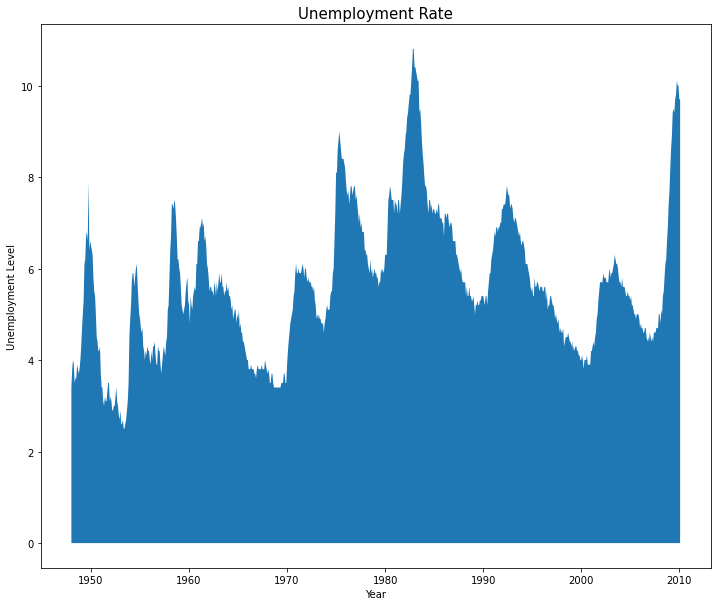

In [6]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10))

# Plot Area Chart
plt.fill_between(ur_df["MoYr"], ur_df["Value"])

# Add chart title and labels
plt.title("Unemployment Rate", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Unemployment Level")

plt.show()

In [7]:
# Pivot dataframe into category expenditures by year

expenditures_pivot_df = expenditures_df.pivot(index='year', columns='category')['expenditure']

In [8]:
expenditures_pivot_df.head()

category,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
year,,,,,,,,,,,,,,
1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093


In [9]:
# Get list of top 3 categories

sortedAvg = expenditures_pivot_df.mean().sort_values(ascending=False)
topCategories = sortedAvg[:3].index.tolist()

In [10]:
# Select Data for chart
x = expenditures_pivot_df.index
y0 = expenditures_pivot_df[topCategories[0]]
y1 = expenditures_pivot_df[topCategories[1]]
y2 = expenditures_pivot_df[topCategories[2]]

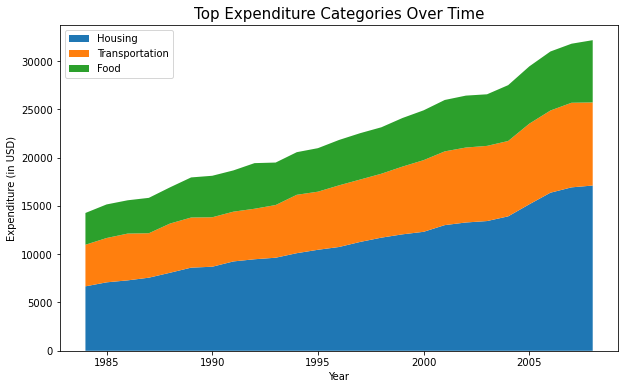

In [11]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot Stacked Area Chart
plt.stackplot(x, y0, y1, y2, labels=topCategories)
plt.legend(loc='upper left')

# Add chart title and labels
plt.title("Top Expenditure Categories Over Time", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Expenditure (in USD)")

plt.show()